<a href="https://colab.research.google.com/github/Raimundo2004/An-lise-supermercado/blob/main/supermercado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**📊 Análise de Vendas de uma Rede de Supermercados**
Neste projeto, realizei uma análise exploratória e diagnóstica utilizando Python e bibliotecas como Pandas, Matplotlib e Seaborn, com o objetivo de identificar padrões de vendas, desempenho por cidade, comportamento dos clientes e impacto das linhas de produtos no faturamento.

As análises trouxeram insights importantes, como diferenças no volume de vendas entre unidades, variações de faturamento por região e preferências de produtos por gênero e tipo de cliente.

###Carregando e análisando a tabela do Supermercado

In [ ]:
import numpy as np
import pandas as pd
mercado = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projetos/Bancos de dados/SuperMarket Analysis.csv')
mercado

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,Giza,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,1:46:00 PM,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,Cairo,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,5:16:00 PM,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,Alex,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,1:22:00 PM,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,Alex,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,3:33:00 PM,Cash,65.82,4.761905,3.2910,4.1


In [ ]:
mercado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Sales                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [ ]:
#Convertendo os valores da coluna 'Date' que era objeto para Datetime
mercado['Date']=pd.to_datetime(mercado['Date'])

In [ ]:
mercado

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,Giza,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,1:46:00 PM,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,Cairo,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,5:16:00 PM,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,Alex,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,1:22:00 PM,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,Alex,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,3:33:00 PM,Cash,65.82,4.761905,3.2910,4.1


In [ ]:
mercado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Sales                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

In [ ]:
#Criando uma coluna meses para identificar melhor os meses
mercado['Month'] = mercado['Date'].dt.month
mercado['Month'] = mercado['Month'].replace({1:'January',2:'February',3:'March'})
mercado['Month'] = pd.Categorical(mercado['Month'], categories=['January','February','March'], ordered=True)
mercado

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1,January
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6,March
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4,March
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4,January
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3,February
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,Giza,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,1:46:00 PM,Ewallet,40.35,4.761905,2.0175,6.2,January
996,303-96-2227,Cairo,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,5:16:00 PM,Ewallet,973.80,4.761905,48.6900,4.4,March
997,727-02-1313,Alex,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,1:22:00 PM,Cash,31.84,4.761905,1.5920,7.7,February
998,347-56-2442,Alex,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,3:33:00 PM,Cash,65.82,4.761905,3.2910,4.1,February


In [ ]:
#Criando mais uma tabela chamada 'Day', para facilitar na plotagem de gráficos
mercado['Day'] = mercado['Date'].dt.day

In [ ]:
mercado.nunique()

,0
Invoice ID,1000
Branch,3
City,3
Customer type,2
Gender,2
Product line,6
Unit price,943
Quantity,10
Tax 5%,990
Sales,990


#Análise

#Unidade

In [ ]:
#Importando as bibliotecas Seaborn e Matplotlib para facilitar a análise
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Gostaria de análisar as a coluna Branch, onde seria os filias do mercado
mercado['Branch'].unique()

array(['Alex', 'Giza', 'Cairo'], dtype=object)

In [ ]:
mercado['Branch'].value_counts()

,count
Branch,
Alex,340
Cairo,332
Giza,328


In [ ]:
#Análisar a coluna "City"
mercado['City'].unique()

array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

In [ ]:
mercado.groupby(['City'])['Quantity'].sum()

,Quantity
City,
Mandalay,1820
Naypyitaw,1831
Yangon,1859


Percebi que os valores de cada tabela corresponde uma a outra, então será que os valores da coluna 'Branch', são os gerentes da coluna 'City'?

In [ ]:
#Para ter certeza agruparei as duas colunas
mercado.groupby(['Branch','City'])['Quantity'].sum()

,,Quantity
Branch,City,
Alex,Yangon,1859
Cairo,Mandalay,1820
Giza,Naypyitaw,1831


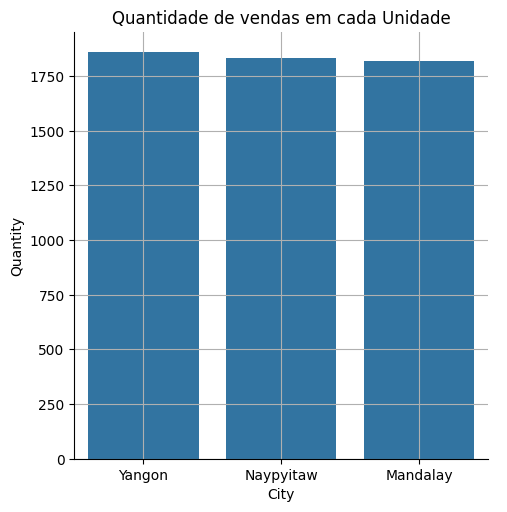

In [ ]:
sns.catplot(data=mercado,x='City', y='Quantity', kind='bar', errorbar=None,estimator="sum")
plt.title('Quantidade de vendas em cada Unidade')
plt.grid(True)

In [ ]:
mercado[mercado['City']=='Yangon']

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month,Day
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1,January,5
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4,March,3
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4,January,27
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3,February,8
6,355-53-5943,Alex,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2019-02-25,2:36:00 PM,Ewallet,413.04,4.761905,20.6520,5.8,February,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,886-18-2897,Alex,Yangon,Normal,Female,Food and beverages,56.56,5,14.1400,296.9400,2019-03-22,7:06:00 PM,Credit card,282.80,4.761905,14.1400,4.5,March,22
992,745-74-0715,Alex,Yangon,Normal,Male,Electronic accessories,58.03,2,5.8030,121.8630,2019-03-10,8:46:00 PM,Ewallet,116.06,4.761905,5.8030,8.8,March,10
997,727-02-1313,Alex,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,1:22:00 PM,Cash,31.84,4.761905,1.5920,7.7,February,9
998,347-56-2442,Alex,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,3:33:00 PM,Cash,65.82,4.761905,3.2910,4.1,February,22


In [ ]:
#Qual unidade lucra mais?
mercado.groupby(['City'])['Sales'].mean()

,Sales
City,
Mandalay,319.872506
Naypyitaw,337.099715
Yangon,312.354031


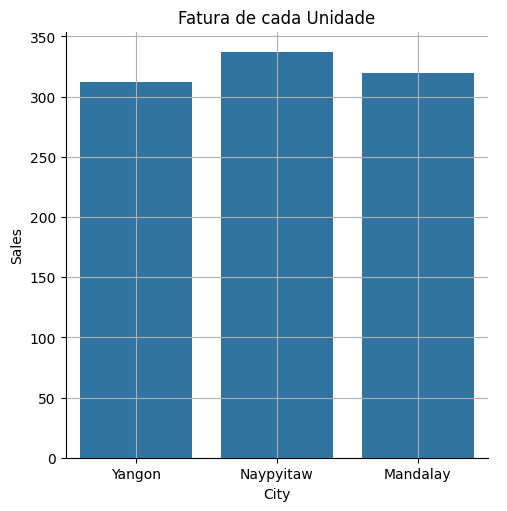

In [ ]:
sns.catplot(data=mercado, x='City', y='Sales', kind='bar', errorbar=None)
plt.title('Fatura de cada Unidade')
plt.grid(True)

In [ ]:
#Gostaria de saber a média de preço de cada unidade
mercado.groupby(['City'])['Unit price'].mean().sort_values(ascending=False)

,Unit price
City,
Naypyitaw,56.609024
Mandalay,55.659277
Yangon,54.780853


In [ ]:
#Nível de satifação dos clietes em cada unidade
mercado.groupby(['City'])['Rating'].mean()

,Rating
City,
Mandalay,6.818072
Naypyitaw,7.072866
Yangon,7.027059


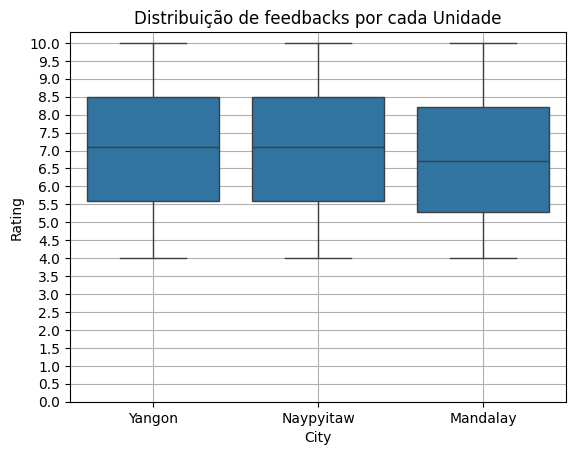

In [ ]:
sns.boxplot(data=mercado, y='Rating', x='City')
plt.title('Distribuição de feedbacks por cada Unidade')
plt.grid(True)
plt.yticks(np.arange(0,10.5,.5))
plt.show()

##Observação
1.   O mercado que tem mais cliente e que vende mais quantidade é a Yango, mas quem mais lucra é a Naypyitaw, pois essa cidade tem um custo de vida mais caro.
2.   Todos as unidades tem uma média de feedback positiva.

#Cliente fidelizado

In [ ]:
#Quero pesquisar qual é a unidade que tem mais clientes
cliente = mercado.groupby(['City'])['Customer type'].count().sort_values(ascending=False)
cliente

,Customer type
City,
Yangon,340
Mandalay,332
Naypyitaw,328


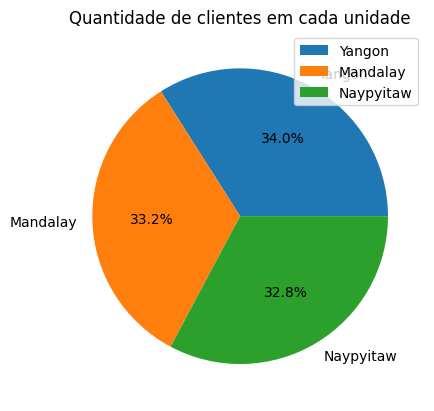

In [ ]:
plt.pie(cliente, labels=cliente.index, autopct='%1.1f%%')
plt.legend(cliente.index)
plt.title('Quantidade de clientes em cada unidade')
plt.show()

In [ ]:
#Qual unidade tem clientes membros?
membros = mercado[mercado['Customer type']=='Member']
membros.groupby(['City'])['Customer type'].count()

,Customer type
City,
Mandalay,181
Naypyitaw,194
Yangon,190


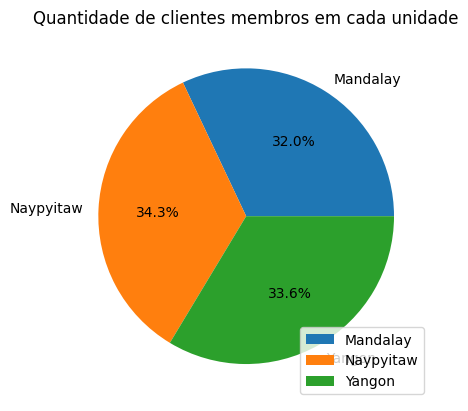

In [ ]:
pie = membros.groupby(['City'])['Customer type'].count()
plt.pie(pie, labels=pie.index, autopct='%1.1f%%')
plt.title('Quantidade de clientes membros em cada unidade')
plt.legend(pie.index)
plt.show()

In [ ]:
#Qual membro fatura mais a rede de supermercado?
mercado.groupby(['Customer type'])['Sales'].mean()

,Sales
Customer type,
Member,335.742945
Normal,306.372379


In [ ]:
#Qual é a média de notas para dos tipos de clientes dão?
mercado.groupby(['Customer type'])['Rating'].mean()

,Rating
Customer type,
Member,6.917168
Normal,7.044828


In [ ]:
#Será que é por que os cliente membro, eles não ganham desconto nos produtos?
mercado.groupby(['City','Customer type'])['Unit price'].mean()

City       Customer type
Mandalay   Member           56.360497
           Normal           54.818742
Naypyitaw  Member           58.255412
           Normal           54.225448
Yangon     Member           55.544474
           Normal           53.813600
Name: Unit price, dtype: float64

##Observação
1.   Yangon é a unidade que tem mais cliente;
2.   A unidade que tem masi clientes membros é a Naypyitaw;
3.   A nota de satisfação do cliente membro é menor do que o cliente normal, pois o cliente que tem fidelidade com o supermercado não tem desconto nos produtos.



#Gênero

In [ ]:
#Qual sexo frequenta mais o supermercado?
mercado.groupby(['Gender'])['Gender'].count()

,Gender
Gender,
Female,571
Male,429


In [ ]:
#Lucro de cada unidade por gênero
mercado.groupby(['Gender'])['Sales'].mean()

,Sales
Gender,
Female,340.931414
Male,299.055738


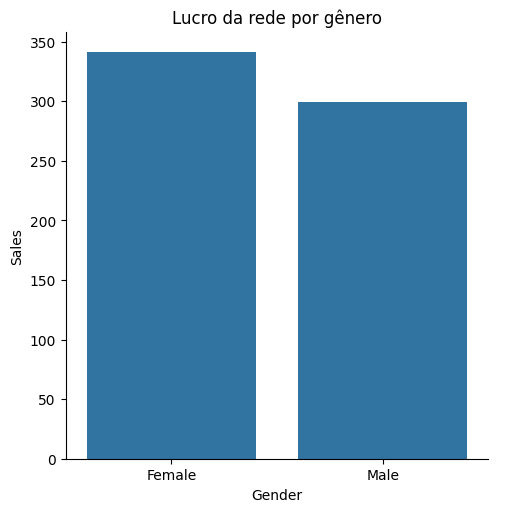

In [ ]:
sns.catplot(data=mercado, x='Gender', y='Sales', kind='bar', errorbar=None)
plt.title('Lucro da rede por gênero')
plt.show()

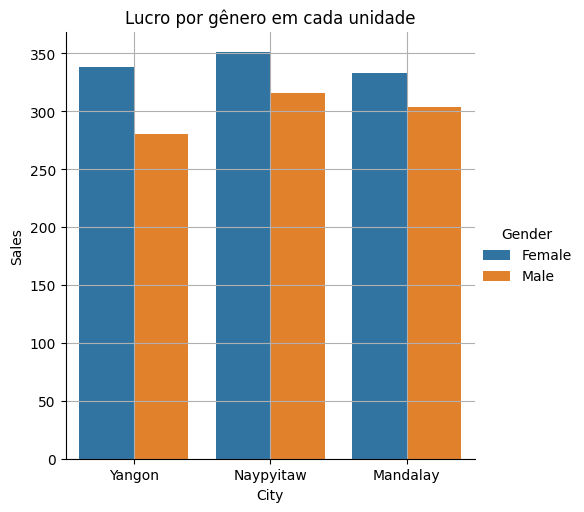

In [ ]:
sns.catplot(data=mercado, x='City',y='Sales',hue='Gender',kind='bar',errorbar=None)
plt.title("Lucro por gênero em cada unidade")
plt.grid(True)
plt.show()

In [ ]:
#Entre os gêneros, qual apresenta o maior número de membros na rede?
membros.groupby(['Gender'])['Customer type'].count()

,Customer type
Gender,
Female,356
Male,209


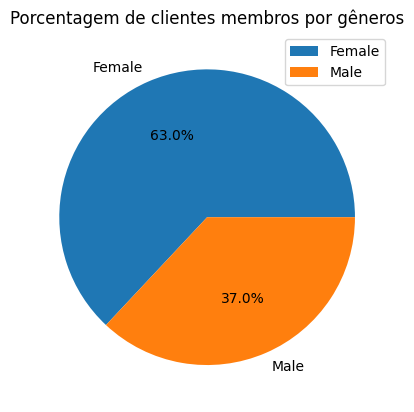

In [ ]:
torta = membros.groupby(['Gender'])['Customer type'].count()
plt.pie(torta, labels=torta.index, autopct='%1.1f%%')
plt.title('Porcentagem de clientes membros por gêneros')
plt.legend(torta.index)
plt.show()

##Observação
1.   As mulheres frequentam supermercado mais vezes que os homens
2.   O gênero que representa mais o cliente membro é o feminino



#Linhas de produtos

In [ ]:
#Qual linhade produto dá mais lucro na rede?
mercado.groupby(['Product line'])["Sales"].mean().sort_values(ascending=False)

,Sales
Product line,
Home and lifestyle,336.636956
Sports and travel,332.065220
Health and beauty,323.643020
Food and beverages,322.671517
Electronic accessories,319.632538
Fashion accessories,305.089298


In [ ]:
#Gostaria de analisar as vendas de cada linha de produto em cada unidade do supermercado
mercado.groupby(['City', 'Product line'])["Sales"].mean()

City       Product line          
Mandalay   Electronic accessories    310.026245
           Fashion accessories       264.730911
           Food and beverages        304.297770
           Health and beauty         376.993585
           Home and lifestyle        350.983290
           Sports and travel         322.390306
Naypyitaw  Electronic accessories    344.890445
           Fashion accessories       331.693385
           Food and beverages        360.103864
           Health and beauty         319.525500
           Home and lifestyle        308.790067
           Sports and travel         350.265067
Yangon     Electronic accessories    305.285225
           Fashion accessories       320.245265
           Food and beverages        295.915526
           Health and beauty         268.037298
           Home and lifestyle        344.879931
           Sports and travel         328.350839
Name: Sales, dtype: float64

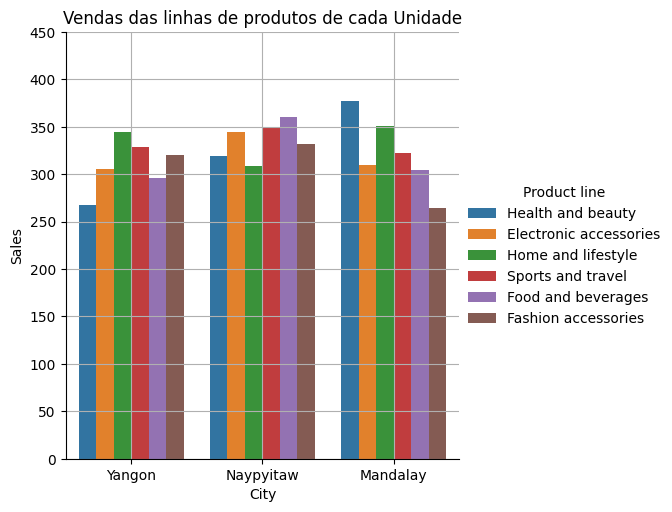

In [ ]:
#Gráfico
sns.catplot(data=mercado, x='City', y='Sales', hue='Product line',kind='bar', errorbar=None)
plt.title("Vendas das linhas de produtos de cada Unidade")
plt.yticks(range(0,500,50))
plt.grid(True)
plt.show()

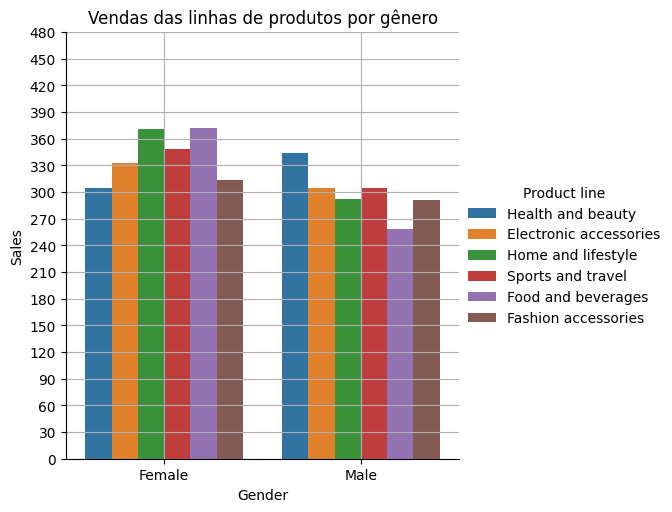

In [ ]:
#Quais linhas de produtos cada gênero consome
sns.catplot(data=mercado, x='Gender', y='Sales', hue='Product line', kind='bar', errorbar=None, dodge=True)
plt.title('Vendas das linhas de produtos por gênero')
plt.grid(True)
plt.yticks(range(0,500,30))
plt.show()

In [ ]:
#Análise da média de preço das linhas de produtos
mercado.groupby(['Product line'])['Unit price'].mean().sort_values(ascending=False)

,Unit price
Product line,
Fashion accessories,57.153652
Sports and travel,56.993253
Food and beverages,56.008851
Home and lifestyle,55.316937
Health and beauty,54.854474
Electronic accessories,53.551588


##Observação
1.   A linha de produto que tem mais lucro na rede de mercado é "Casa e lifestyle", mas para cada unidade já vária, como: Yangon é "Casa e lifestyle", Mandalay é "Saúde e beleza" e em Naypyitaw é "Comidas e bebidas";
2.   As linhas de produtos que as mulheres mais compram está entre "Comidas e bebidas" e "Casa e lifestyle", já para os homens é "Saúde e beleza";
3. O produto com o preço maior é o "Acessório".



#Tempo

In [ ]:
#Saber o tempo de venda dessa rede
mercado['Date'].min(), mercado['Date'].max()

(Timestamp('2019-01-01 00:00:00'), Timestamp('2019-03-30 00:00:00'))

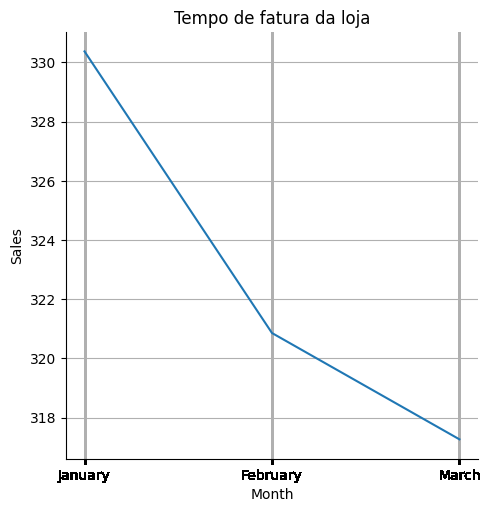

In [ ]:
sns.relplot(data=mercado, x='Month', y='Sales', kind='line', errorbar=None)
plt.title('Tempo de fatura da loja')
plt.grid(True)
plt.xticks(mercado['Month'].sort_values())
plt.show()

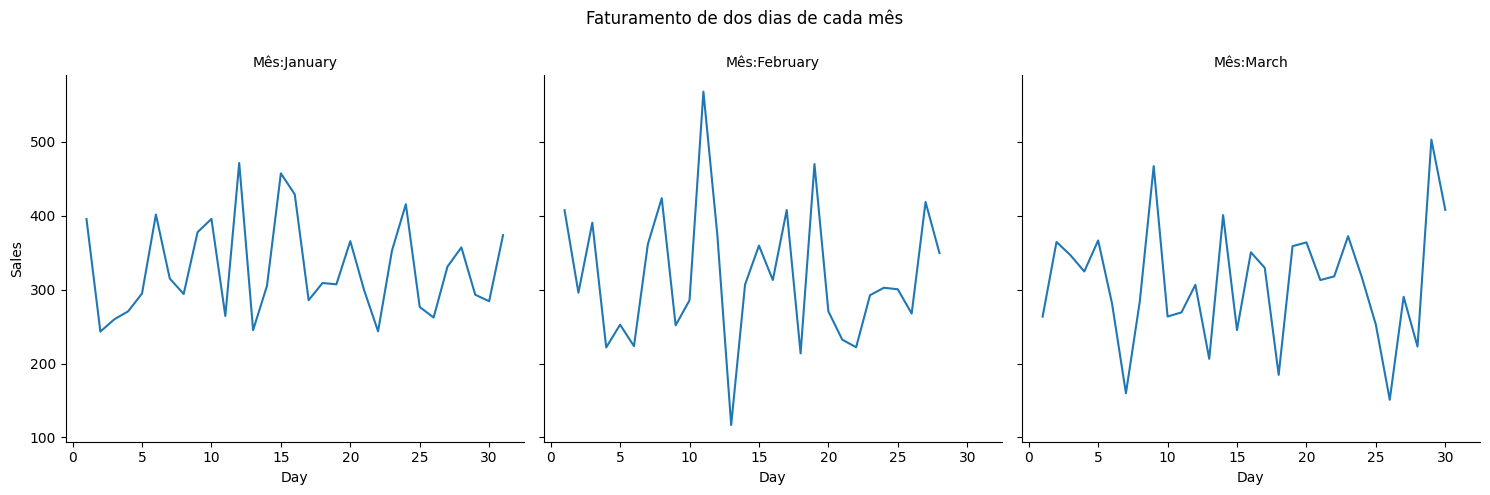

In [ ]:
#Criando um gráfico para analisar melhor as faturas de todos os dias de cada mês
mercado['Day'] = pd.Categorical(mercado['Day'], categories=mercado['Day'].sort_values().unique(), ordered=True)
days = sns.relplot(data=mercado, x='Day', y='Sales', col='Month', kind='line',errorbar=None)
days.fig.suptitle('Faturamento de dos dias de cada mês')
days.set_titles('Mês:{col_name}')
days.fig.subplots_adjust(top=0.85)
plt.show(days)

In [ ]:
#Vendo o horário de expediente da rede
mercado['Time'].min(), mercado['Time'].max()

('10:00:00 AM', '8:59:00 PM')

In [ ]:
#Quero só filtrar o primeiro dia de cada mês
one_day = mercado[mercado['Date'].dt.day==1]

In [ ]:
one_day['Time'].unique()

array(['10:39:00 AM', '1:22:00 PM', '11:27:00 AM', '8:31:00 PM',
       '3:10:00 PM', '2:47:00 PM', '10:08:00 AM', '3:40:00 PM',
       '3:32:00 PM', '7:07:00 PM', '7:48:00 PM', '3:51:00 PM',
       '6:14:00 PM', '11:43:00 AM', '6:43:00 PM', '1:55:00 PM',
       '7:49:00 PM', '12:15:00 PM', '7:54:00 PM', '11:30:00 AM',
       '10:22:00 AM', '8:26:00 PM', '4:23:00 PM', '8:03:00 PM',
       '2:42:00 PM', '11:40:00 AM', '7:31:00 PM', '11:36:00 AM'],
      dtype=object)

In [ ]:
#Colocando em ordem, para apresentar melhor no gráfico
one_day['Time'] =pd.Categorical(one_day['Time'], categories=one_day['Time'].sort_values().unique(), ordered=True)

/tmp/ipython-input-2846641877.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_day['Time'] =pd.Categorical(one_day['Time'], categories=one_day['Time'].sort_values().unique(), ordered=True)


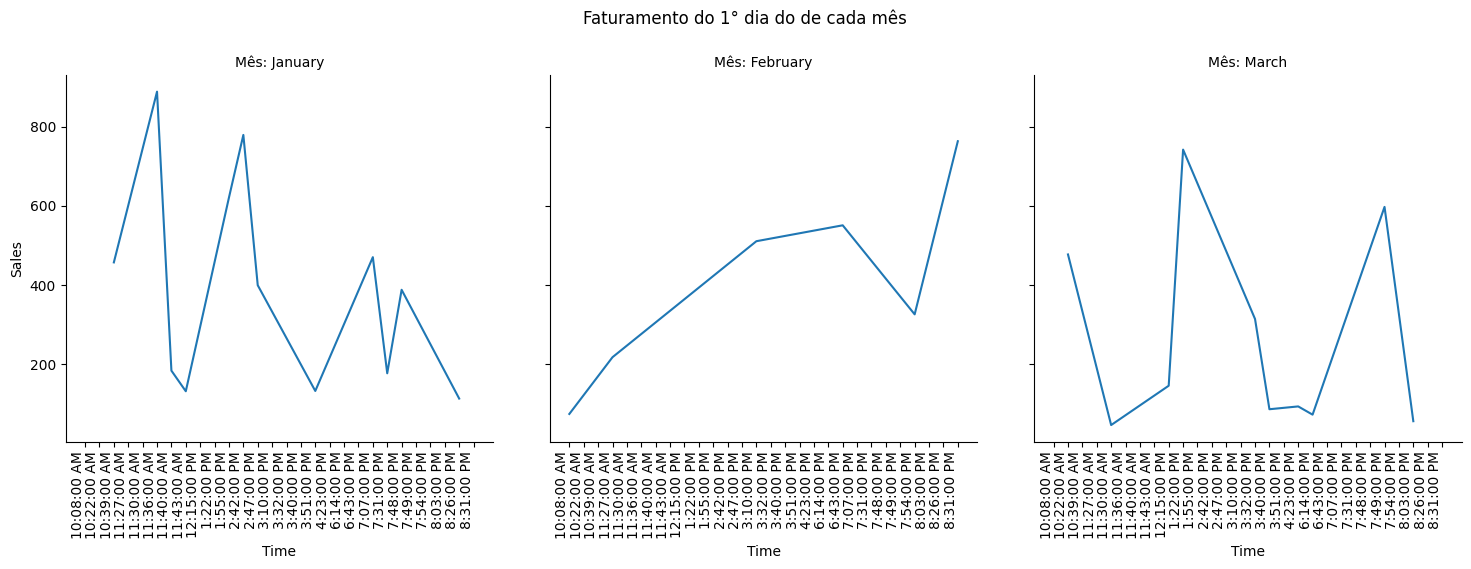

In [ ]:
#Gostaria de saber qual horário vende mais no dia
line = sns.relplot(data=one_day,x='Time', y='Sales', kind='line', col='Month')
line.fig.suptitle("Faturamento do 1° dia do de cada mês")
line.fig.subplots_adjust(top=0.85)
line.set_titles("Mês: {col_name}")
line.set_xticklabels(rotation=90, ha='right')
plt.show(line)

In [ ]:
#Filtrando os últimos dias de cada mês
last_day = mercado[(mercado['Date'].dt.day==30) | ((mercado['Month']=='February') & (mercado['Date'].dt.day==28))]

In [ ]:
last_day['Time'] = pd.Categorical(last_day['Time'], categories=last_day['Time'].sort_values().unique(), ordered=True)

/tmp/ipython-input-430416040.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_day['Time'] = pd.Categorical(last_day['Time'], categories=last_day['Time'].sort_values().unique(), ordered=True)


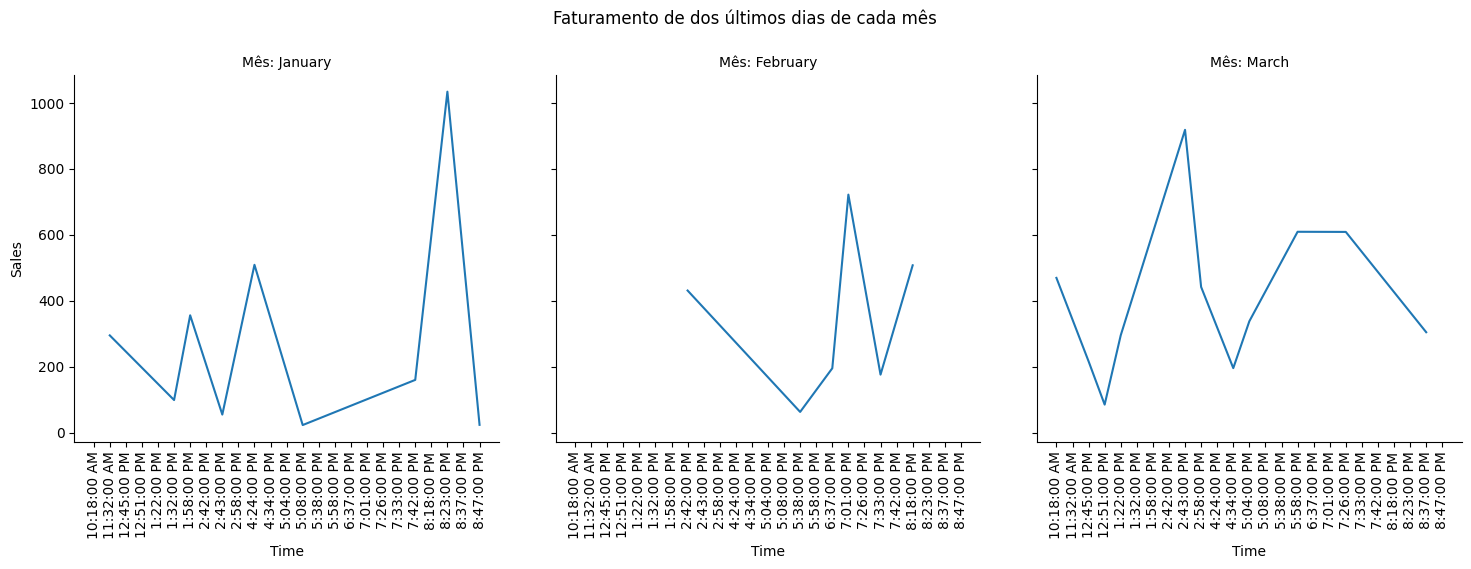

In [ ]:
last = sns.relplot(data=last_day, x='Time', y='Sales', col='Month', errorbar=None,kind='line')
last.fig.suptitle('Faturamento de dos últimos dias de cada mês')
last.set_titles('Mês: {col_name}')
last.fig.subplots_adjust(top=0.85)
last.set_xticklabels(rotation=90)
plt.show(last)

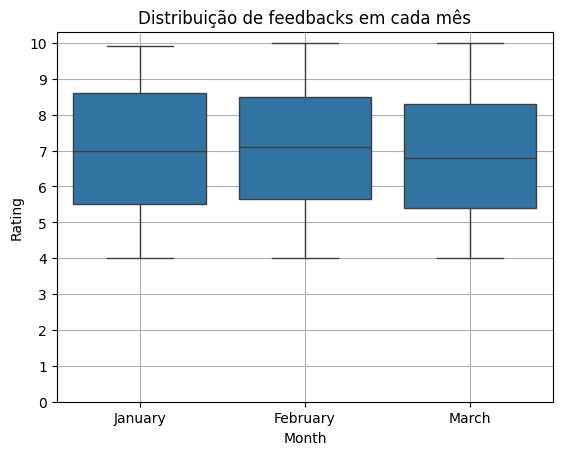

In [ ]:
sns.boxplot(data=mercado, x='Month', y='Rating')
plt.title('Distribuição de feedbacks em cada mês')
plt.yticks(np.arange(0,11))
plt.grid(True)

##Conclusão


1.   Com o tempo o faturamento da rede foi caindo;
2.   Os dias que o estabelecimento conseguio vender mais foi entre os dias 10 e 15;
3. Já os horários que a rede consegui vender mais vária;
4. Todos os meses tem uma média de feedbacks positivos.



#Correlação

In [ ]:
correl = mercado.select_dtypes(include=(float,int)).corr()
correl

,Unit price,Quantity,Tax 5%,Sales,cogs,gross margin percentage,gross income,Rating
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,NaN,0.633962,-0.008778
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,NaN,0.705510,-0.015815
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Sales,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,NaN,-0.036442,1.000000


Olhando essa tabela, percebi que tem a coluna "gross margin percentage", que tem valores 'nulos', pois nessa coluna inteira tem o mesmo valor, então irei tirar para não atrapalhar a análise e plotar uma coluna de mapa térmico para visualizar melhor as correlações.

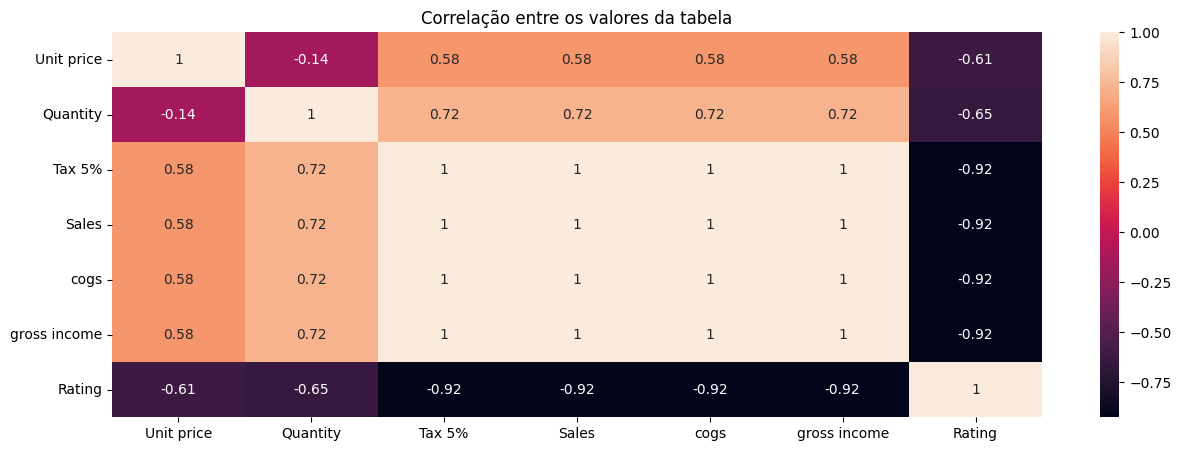

In [ ]:
correl = mercado.select_dtypes(include=(float,int)).corr()
correl = correl.drop(columns='gross margin percentage')
plt.figure(figsize=(15,5))
plt.title("Correlação entre os valores da tabela")
sns.heatmap(data=correl.corr(),annot=True)
plt.show()

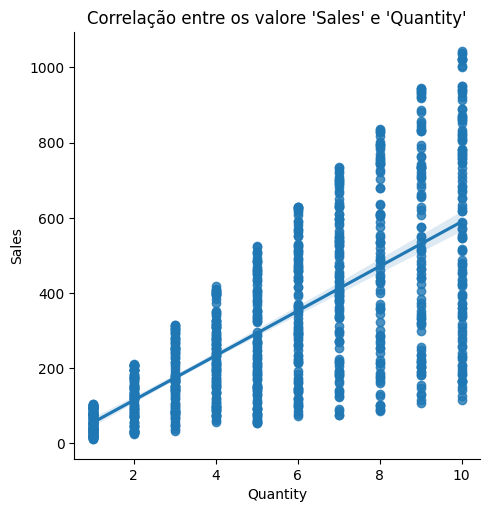

In [ ]:
#Será que a média de preço é mais cara porque conseguem vender mais quantidades?
sns.lmplot(data=mercado, x='Quantity', y='Sales')
plt.title("Correlação entre os valore 'Sales' e 'Quantity'")
plt.show()

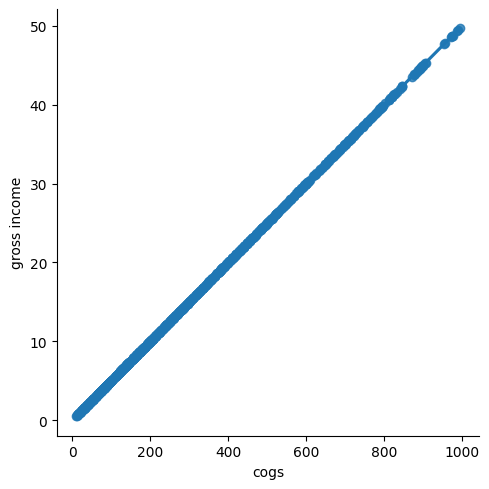

In [ ]:
#Vi que as variáveis 'gross income' e 'cogs' tem uma correlação perfeita, vamos analisar.
sns.lmplot(data=mercado, x='cogs',y='gross income')

##Observação
As correlações entre as variáveis numéricas são fracas, indicando que não há relações lineares relevantes nesse dataset.

#Conclusões


*   Por Naypyitaw ser uma cidade mais desenvolvidas que as restantes, tem uma margin de faturamento maior;
*   O supermercado deveria dar mais atenção aos seus clientes membros;
* Quem frequenta mais os supermercados, é o genêro feminino, então "público alvo", seria o feminino;
* As linhas de produtos que fazem sucesso, são: Casa e Lifestyle, Comidas e Bebidas, e Saúde e Beleza, portanto a rede deverá dar uma atenção a mais nos estoques dessas linhas de produtos
* Média de nota positiva na rede, então significa que o cliente estão satisfeitos, com os serviços e produtos com ótima qualidade;
* Com o passar do tempo o faturamento da rede cai e muito, logo eles devem se atualizarem nos produtos que mais são comprados na região.

**Essas análises podem apoiar decisões estratégicas, como direcionamento de promoções, ajustes no estoque e foco em determinadas linhas de produtos**